In [1]:
%load_ext autotime

import scarf
scarf.__version__

'0.19.6'

In [2]:
scarf.fetch_dataset(
    'tenx_5K_pbmc_rnaseq',
    save_path='scarf_datasets'
)

#### convert into Zarr format

In [3]:
reader = scarf.CrH5Reader(
    'scarf_datasets/tenx_5K_pbmc_rnaseq/data.h5'
    )

In [4]:
reader.nCells, reader.nFeatures

(5025, 33538)

In [5]:
writer = scarf.CrToZarr(
    reader,
    zarr_fn='scarf_datasets/tenx_5K_pbmc_rnaseq/data.zarr',
    chunk_size=(2000, 1000)
)
writer.dump(batch_size=1000)

  0%|                                                                                                         …

In [8]:
ds = scarf.DataStore(
    'scarf_datasets/tenx_5K_pbmc_rnaseq/data.zarr',
    nthreads=4,
    min_features_per_cell=10
)

#### Cell filtering

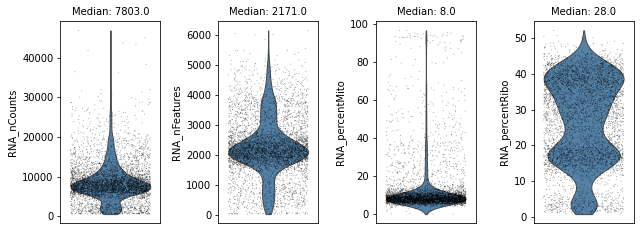

In [9]:
ds.plot_cells_dists()

In [10]:
ds.filter_cells(
    attrs=['RNA_nCounts', 'RNA_nFeatures', 'RNA_percentMito'],
    highs=[15000, 4000, 15],
    lows=[1000, 500, 0]
)

INFO: 597 cells flagged for filtering out using attribute RNA_nCounts
INFO: 461 cells flagged for filtering out using attribute RNA_nFeatures
INFO: 612 cells flagged for filtering out using attribute RNA_percentMito


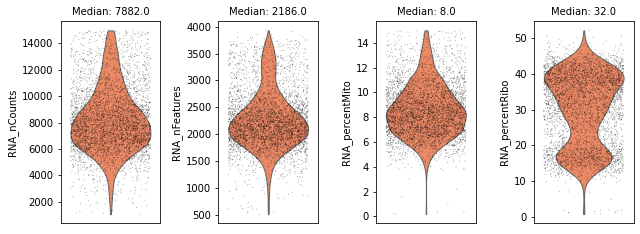

In [11]:
ds.plot_cells_dists(cell_key='I', color='coral')

In [12]:
ds.cells.head()

,I,ids,names,RNA_nCounts,RNA_nFeatures,RNA_percentMito,RNA_percentRibo
0,True,AAACCCAAGCGTATGG-1,AAACCCAAGCGTATGG-1,13537.0,3503.0,10.844353,16.783630
1,True,AAACCCAGTCCTACAA-1,AAACCCAGTCCTACAA-1,12668.0,3381.0,5.975687,20.034733
2,False,AAACCCATCACCTCAC-1,AAACCCATCACCTCAC-1,962.0,346.0,53.430353,2.494802
3,True,AAACGCTAGGGCATGT-1,AAACGCTAGGGCATGT-1,5788.0,1799.0,10.919143,28.783690
4,True,AAACGCTGTAGGTACG-1,AAACGCTGTAGGTACG-1,13186.0,2887.0,7.955407,35.750038
